# RAPTOR：遞迴式摘要處理的樹狀檢索方法

## 概述

### 歡迎進入 RAPTOR 教學！
在本教學中，我們將探討 **RAPTOR**，全名為 *Recursive Abstractive Processing for Tree-Organized Retrieval*（遞迴式摘要處理的樹狀檢索）。  
這是一種創新的檢索技術，透過摘要將資料組織成樹狀結構，使系統能更高效地找到所需資訊。  
搜尋流程從樹的根節點開始，逐層向下導航到更細節的節點，最終返回與查詢最相關的答案。

本教學靈感來自論文 **"RAPTOR: Recursive Abstractive Processing for Tree-Organized Retrieval"**，感謝作者的開創性研究，讓我們能深入探討此技術。  
讓我們開始吧！

---

### 目錄
- [概述](#概述)
- [環境設定](#環境設定)
- [安裝](#安裝)
- [什麼是 RAPTOR？](#什麼是-raptor)
- [文件處理](#文件處理)
- [模型選擇](#模型選擇)
- [樹狀結構建構](#樹狀結構建構)

---

### 參考資料
- [RAPTOR: Recursive Abstractive Processing for Tree-Organized Retrieval](https://arxiv.org/pdf/2401.18059)  
  **作者**：Xinyu Zhang, Tao Lei, Heng Ji, Kevin Small  
  **發表於**：*arXiv preprint arXiv:2401.18059*（2024）

---

## Environment Setup

Set up the environment. You may refer to [Environment Setup](https://wikidocs.net/257836) for more details.

**[Note]**
- ```langchain-opentutorial``` is a package that provides a set of easy-to-use environment setup, useful functions and utilities for tutorials. 
- You can checkout the [```langchain-opentutorial```](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) for more details.

In [1]:
%%capture --no-stderr
%pip install langchain-opentutorial

In [114]:
# Install required packages
from langchain_opentutorial import package

package.install(
    [
        "langsmith",
        "langchain",
        "langchain_core",
        "langchain-anthropic",
        "langchain_community",
        "langchain_text_splitters",
        "langchain_openai",
    ],
    verbose=False,
    upgrade=False,
)

In [115]:
# Set environment variables
from langchain_opentutorial import set_env

set_env(
    {
        "OPENAI_API_KEY": "",
        "LANGCHAIN_API_KEY": "",
        "LANGCHAIN_TRACING_V2": "true",
        "LANGCHAIN_ENDPOINT": "https://api.smith.langchain.com",
        "LANGCHAIN_PROJECT": "RAPTOR: Recursive Abstractive Processing for Tree-Organized Retrieval"
    }
)

Environment variables have been set successfully.


You can alternatively set API keys such as ```OPENAI_API_KEY``` in a ```.env``` file and load them.

[Note] This is not necessary if you've already set the required API keys in previous steps.

In [1]:
# Load API keys from .env file
from dotenv import load_dotenv

load_dotenv(override=True)

True

## Installation

To proceed with this tutorial, you'll need to install the following packages: ```langchain```, ```umap-learn```, ```scikit-learn```, ```langchain_community```, ```tiktoken```, ```langchain-openai```, ```langchainhub```, ```chromadb```, ```langchain-anthropic``` and ```matplotlib```. You can install them all at once using the command below:

In [2]:
%pip install -qU langchain umap-learn scikit-learn langchain_community tiktoken langchain-openai langchainhub chromadb langchain-anthropic matplotlib 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.73.0 requires protobuf<7.0.0,>=6.30.0, but you have protobuf 5.29.5 which is incompatible.
a2a-sdk 0.2.8 requires opentelemetry-api>=1.33.0, but you have opentelemetry-api 1.29.0 which is incompatible.
a2a-sdk 0.2.8 requires opentelemetry-sdk>=1.33.0, but you have opentelemetry-sdk 1.29.0 which is incompatible.
a2a-sdk 0.2.8 requires protobuf==6.31.1, but you have protobuf 5.29.5 which is incompatible.
unstructured-inference 0.8.6 requires pdfminer-six==20240706, but you have pdfminer-six 20250506 which is incompatible.
grpcio-reflection 1.73.0 requires protobuf<7.0.0,>=6.30.0, but you have protobuf 5.29.5 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may 

In [ ]:
pip install --upgrade protobuf==6.31.1 opentelemetry-api==1.33.0 opentelemetry-sdk==1.33.0

### Package List

1. **langchain** ([Github](https://github.com/langchain-ai/langchain)) - LangChain is a framework for developing applications powered by large language models (LLMs).

2. **umap-learn** ([Github](https://github.com/lmcinnes/umap)) - Uniform Manifold Approximation and Projection (UMAP) is a dimensionality reduction technique that can be used for visualization, similar to t-SNE, but also for general non-linear dimensionality reduction. UMAP depends on scikit-learn and its dependencies like numpy and scipy. UMAP also requires numba for performance reasons.

3. **scikit-learn** ([Github](https://github.com/scikit-learn/scikit-learn)) - scikit-learn is a Python module for machine learning built on top of SciPy and distributed under the 3-Clause BSD license. If you want to use the ```umap-learn``` library, this module is highly recommended.

4. **langchain_community** - An extension package provided by the LangChain community, including tools and resources created by the community.

5. **tiktoken** ([Github](https://github.com/openai/tiktoken)) - tiktoken is a fast BPE tokenizer designed for use with OpenAI's models. Language models do not interpret text as we do; instead, they process a sequence of numbers (tokens). Byte pair encoding (BPE) is a method for converting text into tokens.

6. **langchain-openai** ([Github](https://github.com/langchain-ai/langchain/blob/master/docs/docs/integrations/providers/openai.mdx)) - A package that integrates LangChain with OpenAI APIs to leverage OpenAI's language models within LangChain workflows.

7. **langchainhub** - LangChain's "Hub" enables the sharing and reuse of various LangChain components (e.g., chains, agents).

8. **chromadb** ([Visit](https://www.trychroma.com/), [Github](https://github.com/chroma-core/chroma)) - Chroma is an open-source AI application database with built-in features for AI model workflows.

9. **langchain-anthropic** ([Docs](https://python.langchain.com/docs/integrations/providers/anthropic/)) - A package to integrate LangChain with Anthropic APIs, allowing access to language models like Claude through LangChain.

10. **matplotlib** ([Github](https://github.com/matplotlib/matplotlib)) - matplotlib is a popular library for creating static, animated, and interactive visualizations in Python.

## 什麼是 RAPTOR？

**RAPTOR**（Recursive Abstractive Processing for Tree-Organized Retrieval，遞迴抽象化處理的樹狀檢索）是一種新穎的文件索引與檢索方法。

- **葉節點（Leafs）**：代表最初的一組文件。  
- 先將葉節點進行向量化（embedding）並分群（clustering）。  
- 接著，針對每個群組生成更高層級的摘要，涵蓋該群組中所有文件的共同資訊。  
- 這個摘要化的過程會**遞迴進行**，形成一棵從原始文件（葉節點）一路到高階摘要的「樹」。  

這種方法可以用在不同規模的資料上，葉節點可以是：
- 單一文件中的文字分塊（paper 中的示例）
- 整份文件（如下例）  
如果使用支援長上下文的 LLM，甚至可以直接處理整份文件。

---

## 文件處理示例

以下示例將此概念應用到 **LangChain 的 LCEL 文件**。

這裡每一份文件是 LCEL 文件網站上的一個網頁，內容長度差異很大，從不到 2,000 個 token 到超過 10,000 個 token。

整個流程包括：
1. **Token 計數**  
   - 使用 `tiktoken` 函式庫計算字串的 token 數量（依指定的編碼方式）。  

2. **遞迴式 URL 載入**  
   - 使用 `RecursiveUrlLoader` 從指定的 URL 遞迴載入網頁文件。  
   - 載入過程中利用 **BeautifulSoup** 從 HTML 中抽取純文字。  

3. **彙整文字資料**  
   - 從多個 URL 載入文件，將所有文字資料合併成單一清單。  

4. **Token 數計算**  
   - 對每份文件的文字呼叫 `num_tokens_from_string` 函式計算 token 數，並將結果存入清單。  

5. **直方圖視覺化**  
   - 使用 `matplotlib` 繪製 token 數量分佈的直方圖：  
     - X 軸：token 數量  
     - Y 軸：具有該 token 數量的文件數量  

---

## 為什麼用直方圖？
直方圖能幫助我們快速理解資料的分佈狀況，尤其是觀察文字長度的分佈範圍與集中區間，方便後續做文件切分策略或模型輸入長度的調整。

In [23]:
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader
from bs4 import BeautifulSoup as Soup
import tiktoken
import matplotlib.pyplot as plt

In [24]:
# Returns the number of tokens in the given string.
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [30]:
# Loading LCEL Documents
url = "https://python.langchain.com/docs/expression_language/"
loader = RecursiveUrlLoader(
    url=url, max_depth=50, extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()

In [31]:
docs

[Document(metadata={'source': 'https://python.langchain.com/docs/expression_language/', 'content_type': 'text/html; charset=utf-8', 'title': 'LangChain Expression Language (LCEL) | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain', 'description': '* Runnable Interface', 'language': 'en'}, page_content='\n\n\n\n\nLangChain Expression Language (LCEL) | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1\uf8ffüí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a

在 RecursiveUrlLoader 裡的 max_depth 參數，代表 遞迴抓取網頁的最大深度。

⸻

什麼是「抓取深度」？
	•	當你指定一個初始網址（例如 LCEL 首頁），RecursiveUrlLoader 會：
	1.	先抓取該頁內容
	2.	找到頁面中所有符合條件的連結（通常是同一網域）
	3.	依序進入這些連結抓取內容，再從這些子頁面繼續往下找連結
	•	深度指的就是這個「往下點連結」的層級數。

⸻

例子

假設 max_depth=2：
	•	深度 0：初始頁面
	•	深度 1：初始頁面中的所有連結頁面
	•	深度 2：這些連結頁面中再往下點出的頁面
	•	不再深入：超過第 2 層的連結不會抓取

⸻

為什麼要限制深度？
	1.	避免無限遞迴
有些網站連結可能會互相指回前面頁面，沒有深度限制會導致無限循環抓取。
	2.	控制資料量
深度越大，抓取的頁面數量和資料量會指數級增加，會影響執行時間和記憶體消耗。
	3.	專注範圍
如果只想抓特定層級的內容（例如目錄頁 + 子頁面），可以限制深度避免抓到太多不相關的資料。

⸻


In [33]:
# Loading LCEL Documents Using PydanticOutputParser (External LCEL Documents)
url = "https://python.langchain.com/docs/how_to/output_parser_structured/"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_pydantic = loader.load()

In [34]:
docs_pydantic

[Document(metadata={'source': 'https://python.langchain.com/docs/how_to/output_parser_structured/', 'content_type': 'text/html; charset=utf-8', 'title': 'How to use output parsers to parse an LLM response into structured format | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain', 'description': 'Language models output text. But there are times where you want to get more structured information than just text back. While some model providers support built-in ways to return structured output, not all do.', 'language': 'en'}, page_content='\n\n\n\n\nHow to use output parsers to parse an LLM response into structured format | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1\uf8ffüí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBui

In [12]:
# Loading External LCEL Documents Using Self-Query Retriever
url = "https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/self_query/"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_sq = loader.load()

In [35]:
# Document Text
docs.extend([*docs_pydantic, *docs_sq])
docs_texts = [d.page_content for d in docs]

In [36]:
docs

[Document(metadata={'source': 'https://python.langchain.com/docs/expression_language/', 'content_type': 'text/html; charset=utf-8', 'title': 'LangChain Expression Language (LCEL) | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain', 'description': '* Runnable Interface', 'language': 'en'}, page_content='\n\n\n\n\nLangChain Expression Language (LCEL) | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1\uf8ffüí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a

In [37]:
docs_texts

['\n\n\n\n\nLangChain Expression Language (LCEL) | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1\uf8ffüí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallel

In [38]:
# Calculating Token Count for Each Document
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

<function matplotlib.pyplot.show(close=None, block=None)>

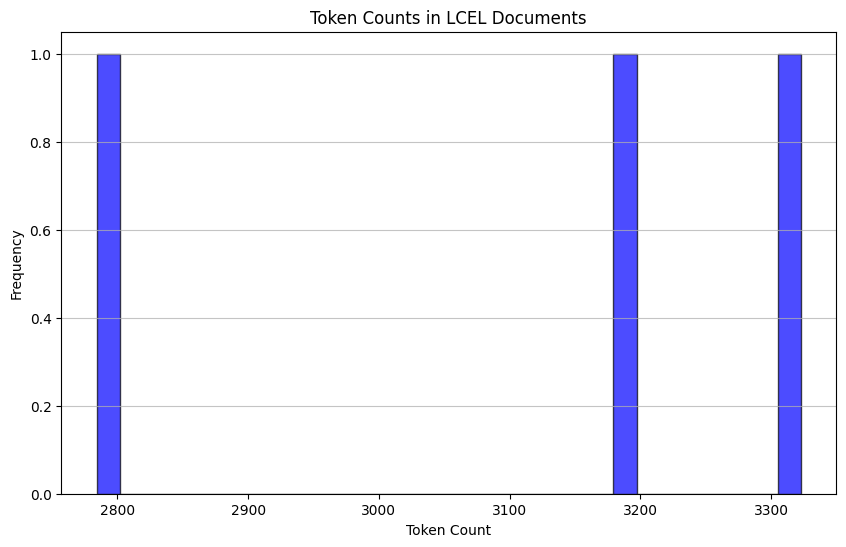

In [39]:
# Plotting a Histogram of Token Counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Token Counts in LCEL Documents")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Displaying the Histogram
plt.show


## 解釋文件排序、合併文字與計算 Token 數的流程

- 將文件列表 (`docs`) 依照其 **metadata** 中 `"source"` 鍵的值進行排序。  
- 將排序後的文件列表反轉順序。  
- 使用特定的分隔符號（`"\n\n\n --- \n\n\n"`）將反轉後文件的文字內容串接在一起。  
- 使用 `num_tokens_from_string` 函數計算合併後文字的 Token 數，並輸出結果。  
- Token 計算過程中採用 `"cl100k_base"` 模型進行分詞與編碼。

In [40]:
# 文件內容合併與 Token 計算

# 根據文件的來源 (metadata["source"]) 進行排序
d_sorted = sorted(docs, key=lambda x: x.metadata["source"])

# 將排序後的文件列表反轉，讓最後的文件排在最前
d_reversed = list(reversed(d_sorted))

# 將反轉後的文件內容用指定分隔符號 "\n\n\n --- \n\n\n" 連接起來
concatenated_content = "\n\n\n --- \n\n\n".join(
    [
        # 取出每個文件的文字內容 (page_content)
        doc.page_content
        for doc in d_reversed
    ]
)

# 計算合併後的文字內容的 Token 數量（使用 cl100k_base 分詞模型）
print(
    "所有內容的 Token 總數: %s"
    % num_tokens_from_string(concatenated_content, "cl100k_base")
)

所有內容的 Token 總數: 9302


## 使用 `RecursiveCharacterTextSplitter` 切分文字的流程解釋

- **設定分塊大小**  
  將變數 `chunk_size_tok` 設為 `2000`，表示每個文字分塊的大小限制為 **2000 個 token**。

- **初始化文字切分器**  
  使用 `RecursiveCharacterTextSplitter` 的 `from_tiktoken_encoder` 方法建立切分器：  
  - `chunk_size=2000`：每塊的最大 token 數為 2000  
  - `chunk_overlap=0`：切分時沒有重疊區域，確保每塊內容互不重複

- **切分文字內容**  
  呼叫已初始化的切分器的 `split_text` 方法，將 `concatenated_content`（合併後的全文字內容）切分成多個分塊，並將結果存入 `texts_split` 變數中。

In [41]:
# Code for Text Splitting
from langchain_text_splitters import RecursiveCharacterTextSplitter

chunk_size_tok = 2000  # Set the chunk size for tokens.  
# Initialize the recursive character text splitter and configure the chunk size and overlap using a token encoder.
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=chunk_size_tok, chunk_overlap=0
)
texts_split = text_splitter.split_text(
    concatenated_content
)  # Split the given text.

In [42]:
texts_split

['Self-querying | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain',
 'Skip to main contentThis is documentation for LangChain v0.1, which is no longer actively maintained. Check out the docs for the latest version here.ComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTubev0.1Latestv0.2v0.1\uf8ffü¶úÔ∏è\uf8ffüîóLangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS Docs\uf8ffüí¨SearchModel I/OPromptsChat modelsLLMsOutput parsersRetrievalDocument loadersText splittersEmbedding modelsVector storesRetrieversVector store-backed retrieverRetrieversMultiQueryRetrieverContextual compressionCustom RetrieverEnsemble RetrieverLong-Context ReorderMultiVector RetrieverParent Document RetrieverSelf-queryingTime-weighted vector store retrieverIndexingCompositionToolsAgentsChainsMoreComponentsThis is documentation for LangChain v0.1, which is no longer actively maintained.For the current stable version, see this version (Latest).Retr

## 模型（Models）

在此流程中，可以測試多種模型，包括最新的 **Claude 3** 系列。

---

### 設定 API 金鑰
若要使用不同廠商的服務，需設定對應的 API Key：
- **OpenAI**：設定 `OPENAI_API_KEY`
- **Anthropic**：設定 `ANTHROPIC_API_KEY`

---

### 建立聊天機器人模型
可使用以下兩種模型建立對話應用：
- `ChatOpenAI`（適用於 OpenAI 模型）
- `ChatAnthropic`（適用於 Anthropic 模型）

#### 步驟：
1. **初始化 Embedding 功能**  
   - 實例化 `OpenAIEmbeddings`，啟用 OpenAI 的向量嵌入功能，用於語意檢索與相似度計算。

2. **初始化對話模型**  
   - 使用 `ChatOpenAI` 或 `ChatAnthropic` 建立聊天模型。
   - 將 `temperature` 設為 `0`，確保輸出結果穩定且具一致性（適合檢索與推理場景）。

---

**提示**  
- 溫度（temperature）越低，模型越傾向產生一致且可預測的回覆。  
- 若需更具創造性或多樣性的回覆，可適度提高溫度值（如 `0.7`）。

In [21]:
from dotenv import load_dotenv

load_dotenv()

True

The following code illustrates how to set up ```Cache Embedding``` using ```LangChain```. It prevents redundant embedding calculations for identical inputs by storing and reusing cached values.

In [43]:
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import CacheBackedEmbeddings
from langchain.storage import LocalFileStore

# Defines a local directory to store cached data.
store = LocalFileStore("./cache/")

# Initializing the Embedding Instance
embd = OpenAIEmbeddings(model="text-embedding-3-small", disallowed_special=())

# Combining Cache Backend with Embeddings
cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
    embd, # The OpenAIEmbeddings instance that performs the embedding calculations.
    store, # The LocalFileStore instance where cache data is saved.
    namespace=embd.model # Assigns the embedding model's name as the namespace for cached data to avoid conflicts with other models.
)

The following code demonstrates how to initialize ChatOpenAI and ChatAnthropic models using LangChain and utilize streaming functionality to output results token by token.

In [ ]:
from langchain_anthropic import ChatAnthropic
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.callbacks.base import BaseCallbackHandler

# 定義一個自訂的回呼類別來處理 Token 串流
# 繼承自 LangChain 的 BaseCallbackHandler
# 用來在生成過程中即時列印每個產生的 Token
class StreamCallback(BaseCallbackHandler):
    def on_llm_new_token(self, token: str, **kwargs):
        # 逐個 Token 列印，避免換行，確保可以即時顯示生成的文字
        print(token, end="", flush=True)

# 初始化 ChatOpenAI 模型
# 使用 OpenAI 的 GPT 模型（"gpt-4-turbo-preview"）
# temperature 設為 0，確保輸出具一致性（可重現）
# 啟用 streaming 以便即時生成文字
# 使用自訂的 StreamCallback 來處理 Token 串流
model = ChatOpenAI(
    model="gpt-4-turbo-preview",   # 指定要使用的 OpenAI 模型
    temperature=0,                # 設為 0 以獲得穩定且可預測的輸出
    streaming=True,               # 啟用即時串流生成
    callbacks=[StreamCallback()], # 綁定自訂的 Token 串流回呼
)

# ==============================================================================
# ChatAnthropic 模型初始化（可選）
# ------------------------------------------------------------------------------
# 取消註解以下程式碼以改用 Anthropic 的 ChatAnthropic 模型
# 此範例使用 Claude 模型（"claude-3-opus-20240229"）
# 同樣將 temperature 設為 0 以確保輸出穩定
# ==============================================================================

# model = ChatAnthropic(
#     temperature=0,                  # 設為 0 以獲得穩定且可預測的輸出
#     model="claude-3-opus-20240229"   # 指定要使用的 Anthropic 模型
# )

## 樹狀結構構建（Tree Construction）

在 RAPTOR 的樹狀結構構建中，使用的分群方法包含多個有趣的概念。

---

### GMM（高斯混合模型）
- 用來模擬資料點在不同群集中的分佈情況。
- 透過評估 **BIC（貝氏資訊準則）** 來判斷最佳的群集數量。

---

### UMAP（Uniform Manifold Approximation and Projection）
- 支援資料的群集分析。
- 將高維度資料降維到較低的維度，方便視覺化與後續分析。
- 強調依據資料點間的相似性來形成自然分組。

---

### 區域與全域分群（Local and Global Clustering）
- 在不同層級分析資料。
- 能同時捕捉細緻的模式與較大範圍的整體趨勢。

---

### 閾值判斷（Thresholding）
- 在 GMM 中用來判定資料點是否屬於某群集。
- 基於機率分佈，資料點可被分配到一個或多個群集。

---

### 來源說明
GMM 與閾值判斷的程式碼引用自 Sarthi 等人的研究與專案：
- [原始程式庫](https://github.com/parthsarthi03/raptor/blob/master/raptor/cluster_tree_builder.py)  
- [經過少量調整的版本](https://github.com/run-llama/llama_index/blob/main/llama-index-packs/llama-index-packs-raptor/llama_index/packs/raptor/clustering.py)  

完整致謝兩位作者的貢獻。

---

### `global_cluster_embeddings` 函數
該函數使用 **UMAP** 進行全域嵌入降維，具體功能：
- 將輸入的向量嵌入（embeddings）降維至指定的維度（`dim`）。
- `n_neighbors` 參數指定 UMAP 分析時考慮的鄰居數量，若未設定則預設為嵌入數量的平方根。
- `metric` 參數用於設定距離計算方式。
- 最終輸出為降維後的 **NumPy 陣列**。

In [ ]:
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd
import umap.umap_ as umap
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from sklearn.mixture import GaussianMixture

RANDOM_SEED = 42  # 固定隨機種子，確保結果可重現

### --- 針對上方參考程式碼補充中文註解與說明 --- ###


def global_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    """
    使用 UMAP 對嵌入向量（embeddings）進行「全域」降維。

    參數說明：
    - embeddings：輸入的嵌入向量，NumPy 陣列。
    - dim：降維後的目標維度（n_components）。
    - n_neighbors：可選；每個點在 UMAP 中所考慮的鄰居數量。
                    若未指定，預設為 (樣本數 - 1) 的平方根。
    - metric：UMAP 使用的距離量測方式（例如 "cosine"）。

    回傳：
    - 經 UMAP 降維後的 NumPy 陣列（shape: [num_samples, dim]）。
    """
    if n_neighbors is None:
        # 若未指定鄰居數，採用樣本數量的平方根作為合理的預設
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)

## 解釋 `local_cluster_embeddings` 函式的運作流程

`local_cluster_embeddings` 函式的主要目的是針對嵌入向量（embeddings）進行**局部降維**，以便在特定的群集或資料子集內保留更多局部結構特徵。

---

### 處理步驟

1. **輸入資料**  
   - 接收一組嵌入向量 `embeddings`（NumPy 陣列形式）。
   - 這些嵌入向量通常來自文件、段落或其他資料的語義表示。

2. **降維目標設定**  
   - 使用參數 `dim` 指定降維後的維度數量。  
   - 例如，若設定 `dim=2`，則降維後可用於二維視覺化。

3. **UMAP 降維過程**  
   - 採用 UMAP（Uniform Manifold Approximation and Projection）演算法進行降維。  
   - 在此過程中：
     - `num_neighbors` 參數決定了每個資料點在計算鄰近關係時要考慮多少鄰居。
     - `metric` 參數指定距離度量方法（例如 `"cosine"`、`"euclidean"`）。

4. **回傳結果**  
   - 降維後的嵌入向量以 NumPy 陣列形式回傳，維度為 `[樣本數, dim]`。

---

### 功能重點
- **局部性保留**：與全域降維不同，局部降維更注重保留資料的鄰近結構。  
- **靈活調整**：`num_neighbors` 與 `metric` 可依不同資料分佈與應用需求進行調整。  
- **應用場景**：  
  - 在群集內做更細緻的分析  
  - 視覺化局部群集的語義分佈  
  - 提升樹狀檢索（如 RAPTOR）中的分層檢索精度

In [ ]:
def local_cluster_embeddings(
    embeddings: np.ndarray, dim: int, num_neighbors: int = 10, metric: str = "cosine"
) -> np.ndarray:
    """
    對嵌入向量（embeddings）進行**局部降維**處理。
    通常用於全域聚類（global clustering）之後，
    針對局部群集進一步降維以保留更多局部結構特徵。

    參數：
    - embeddings: 輸入的嵌入向量，NumPy 陣列格式。
    - dim: 降維後的目標維度數量。
    - num_neighbors: 每個點在建立局部鄰近關係時要考慮的鄰居數量。
    - metric: UMAP 使用的距離度量方式（例如 "cosine"、"euclidean"）。

    回傳：
    - NumPy 陣列，表示降維後的嵌入向量。
    """
    return umap.UMAP(
        n_neighbors=num_neighbors,  # 設定每個點的鄰居數量
        n_components=dim,           # 降維後的維度
        metric=metric               # 距離計算方式
    ).fit_transform(embeddings)     # 執行 UMAP 降維並回傳結果

## get_optimal_clusters 函式解說

`get_optimal_clusters` 函式的用途是根據輸入的嵌入向量（embeddings）資料，自動判斷最佳的聚類數量。  
這是透過 **高斯混合模型（Gaussian Mixture Model, GMM）** 計算 **貝氏資訊準則（Bayesian Information Criterion, BIC）** 來完成的。

---

### 核心流程

1. **輸入資料**
   - 接收一組 NumPy 陣列格式的向量資料（`embeddings`）。

2. **最大聚類數設定**
   - `max_clusters` 參數設定要測試的最大聚類數量（預設為 `50`），作為搜索範圍上限。

3. **固定隨機種子**
   - 使用固定的 `random_state` 以確保每次執行結果一致，方便重現實驗。

4. **迴圈計算**
   - 依次嘗試從 `1` 到 `max_clusters` 不同的聚類數。
   - 每次都用 GMM 建立模型並計算該模型的 **BIC 值**。

5. **最佳聚類數判定**
   - 選擇 **BIC 值最低** 的聚類數作為最佳結果。
   - 回傳該最佳聚類數。

---

### 為什麼使用 BIC？
- **BIC** 是一種平衡「模型擬合度」與「模型複雜度」的評估指標。
- BIC 值越低，代表該模型在解釋資料的同時，沒有過度複雜化。

---

### 使用場景
此函式特別適合：
- 不確定資料應該分成幾群時。
- 在聚類前希望自動決定最合適的 `k` 值，避免人工猜測。
- 大型文本或嵌入向量的自動聚類分析（例如文件檢索、知識庫分群）。

---

In [ ]:
def get_optimal_clusters(
    embeddings: np.ndarray, max_clusters: int = 50, random_state: int = RANDOM_SEED
) -> int:
    """
    使用高斯混合模型（GMM）與貝氏資訊準則（BIC）來決定最佳的聚類數量。

    參數:
    - embeddings: 輸入的向量嵌入，NumPy 陣列格式。
    - max_clusters: 最大可考慮的聚類數量。
    - random_state: 隨機種子值，用於確保結果可重現。

    回傳:
    - 整數，表示最佳的聚類數量。
    """
    max_clusters = min(
        max_clusters, len(embeddings)
    )  # 將最大聚類數限制為 max_clusters 與 embeddings 長度中的較小值
    n_clusters = np.arange(1, max_clusters)  # 生成從 1 到 max_clusters-1 的聚類數範圍
    bics = []  # 用來儲存每個聚類數對應的 BIC 分數
    for n in n_clusters:  # 逐一遍歷每個聚類數
        gm = GaussianMixture(
            n_components=n, random_state=random_state
        )  # 初始化高斯混合模型，設定 n 個聚類
        gm.fit(embeddings)  # 用輸入的 embeddings 訓練模型
        bics.append(gm.bic(embeddings))  # 將訓練後模型的 BIC 分數加入列表
    return n_clusters[np.argmin(bics)]  # 回傳 BIC 分數最小的聚類數

## GMM_cluster 函式中文解釋

`GMM_cluster` 用來對向量嵌入（embeddings）進行聚類，  
並透過 **高斯混合模型（Gaussian Mixture Model, GMM）** 搭配 **機率閾值** 來決定每個向量的群組歸屬。

---

### 參數說明
- **embeddings**：輸入的向量嵌入資料（NumPy 陣列）。
- **threshold**：機率閾值，決定向量必須在該機率以上才會被分配到特定群組。
- **random_state**：隨機種子，確保結果可重現。

---

### 程式流程
1. **決定最佳聚類數**  
   - 呼叫 `get_optimal_clusters` 來根據 **BIC（Bayesian Information Criterion）** 自動判斷最佳聚類數。

2. **建立與訓練 GMM 模型**  
   - 根據最佳聚類數初始化 Gaussian Mixture Model。
   - 使用輸入的 `embeddings` 訓練模型。

3. **計算群組分配機率**  
   - 對每個向量計算屬於各群組的機率分佈。
   - 若某群組機率超過 `threshold`，則將該向量分配到該群組。

4. **輸出結果**  
   - 回傳 **向量的群組標籤** 與 **最佳聚類數** 兩個值（以 tuple 形式）。

---

### 特點與應用
- **彈性機率閾值**：可用於多群組歸屬的情境（如文件可能同時屬於多個主題）。
- **自動化最佳化**：無需人工設定 K 值，由系統自動計算最佳群組數量。
- **適用場景**：  
  - 文件主題分類  
  - 嵌入向量的語義分群  
  - RAG（檢索增強生成）系統中的主題層級組織

---

In [133]:
def GMM_cluster(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    """
    Clusters embeddings using a Gaussian Mixture Model (GMM) based on a probability threshold.

    Parameters:
    - embeddings: Input embeddings as a numpy array.
    - threshold: Probability threshold for assigning embeddings to clusters.
    - random_state: Seed for reproducibility.

    Returns:
    - A tuple containing the cluster labels and the determined number of clusters.
    """
    n_clusters = get_optimal_clusters(embeddings)  # Determine the optimal number of clusters.
    # Initialize the Gaussian Mixture Model.
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gm.fit(embeddings)  # Train the model on the embeddings.
    probs = gm.predict_proba(
        embeddings
    )  # Predict the probabilities of each embedding belonging to each cluster.
    # Select clusters as labels where the probabilities exceed the threshold.
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters  # Return the labels and the number of clusters.



## 解釋 `perform_clustering` 函數

`perform_clustering` 函數用於在嵌入數據（embeddings）上執行降維、全局聚類（Global Clustering）以及局部聚類（Local Clustering），並返回最終的聚類結果。

---

### 1. 降維（Dimensionality Reduction）
- 將輸入的嵌入數據使用 **UMAP** 降至指定的維度（`dim`）。
- 這一步是為後續的聚類步驟做準備，降低計算複雜度並保留數據的主要結構特徵。

---

### 2. 全局聚類（Global Clustering）
- 在降維後的嵌入數據上使用 **高斯混合模型（GMM）** 進行全局聚類。
- 根據設定的 **機率閾值（`threshold`）** 來決定每個嵌入屬於哪個聚類。
- 最終為每個數據點分配一個全局聚類 ID。

---

### 3. 局部聚類（Local Clustering）
- 針對每個全局聚類內的嵌入數據，再次執行：
  1. 降維（使用 UMAP）
  2. GMM 聚類
- 這一步可以在全局聚類的基礎上，找出更細粒度的數據分組，捕捉子群模式。

---

### 4. 最終輸出（Final Output）
- 函數會為每個嵌入分配：
  - **全局聚類 ID**
  - **局部聚類 ID**
- 返回的列表會依照輸入順序包含每個嵌入的聚類標籤，形成層次化的聚類結果。

---

### 使用場景與優勢
- 適用於高維度、結構複雜的數據分析。
- 能同時捕捉資料的 **宏觀結構（Global Patterns）** 與 **微觀細節（Local Patterns）**。
- 在文本檢索、知識庫組織、文件聚合等場景中特別有效。

In [ ]:
def perform_clustering(
    embeddings: np.ndarray,
    dim: int,
    threshold: float,
) -> List[np.ndarray]:
    """
    執行降維、全局聚類（GMM）與局部聚類的函數。

    參數:
    - embeddings: 輸入的嵌入向量（numpy array 格式）
    - dim: 使用 UMAP 降維後的目標維度
    - threshold: 在 GMM 聚類中分配樣本到聚類的機率閾值

    回傳:
    - numpy array 列表，每個元素代表對應樣本的聚類 ID
    """
    if len(embeddings) <= dim + 1:
        # 如果資料不足以進行聚類，直接返回全為 0 的聚類結果
        return [np.array([0]) for _ in range(len(embeddings))]

    # 全局降維
    reduced_embeddings_global = global_cluster_embeddings(embeddings, dim)
    # 全局聚類
    global_clusters, n_global_clusters = GMM_cluster(
        reduced_embeddings_global, threshold
    )

    all_local_clusters = [np.array([]) for _ in range(len(embeddings))]
    total_clusters = 0

    # 逐一處理每個全局聚類，進行局部聚類
    for i in range(n_global_clusters):
        # 取出屬於當前全局聚類的嵌入向量
        global_cluster_embeddings_ = embeddings[
            np.array([i in gc for gc in global_clusters])
        ]

        if len(global_cluster_embeddings_) == 0:
            continue
        if len(global_cluster_embeddings_) <= dim + 1:
            # 如果該全局聚類樣本數過少，直接分配為單一局部聚類
            local_clusters = [np.array([0]) for _ in global_cluster_embeddings_]
            n_local_clusters = 1
        else:
            # 局部降維與局部聚類
            reduced_embeddings_local = local_cluster_embeddings(
                global_cluster_embeddings_, dim
            )
            local_clusters, n_local_clusters = GMM_cluster(
                reduced_embeddings_local, threshold
            )

        # 分配局部聚類 ID，並考慮已經處理過的總聚類數進行 ID 偏移
        for j in range(n_local_clusters):
            local_cluster_embeddings_ = global_cluster_embeddings_[
                np.array([j in lc for lc in local_clusters])
            ]
            indices = np.where(
                (embeddings == local_cluster_embeddings_[:, None]).all(-1)
            )[1]
            for idx in indices:
                all_local_clusters[idx] = np.append(
                    all_local_clusters[idx], j + total_clusters
                )

        total_clusters += n_local_clusters

    return all_local_clusters

Implement the function ```embed``` to generate embeddings for a list of text documents.

- Takes a list of text documents (```texts```) as input.
- Uses the ```embed_documents``` method of the ```embd``` object to generate embeddings for the text documents.
- Converts the generated embeddings into a ```numpy.ndarray``` format and returns it.

In [135]:
def embed(texts):
    # Generates embeddings for a list of text documents.
    #
    # This function assumes that the `embd` object exists, which has a method
    # `embed_documents` that takes a list of texts and returns their embeddings.
    #
    # Parameters:
    # - texts: List[str], a list of text documents to be embedded.
    #
    # Returns:
    # - numpy.ndarray: An array of embeddings for the given text documents.
    text_embeddings = embd.embed_documents(
        texts
    )  # Generate embeddings for the text documents.
    text_embeddings_np = np.array(text_embeddings)  # Convert the embeddings to a numpy array.
    return text_embeddings_np  # Return the embedded numpy array.



The ```embed_cluster_texts``` function embeds and clusters a list of texts, returning a ```pandas.DataFrame``` containing the original texts, their embeddings, and assigned cluster labels.

- Generates embeddings for the given list of texts.
- Performs clustering based on the generated embeddings using the predefined ```perform_clustering``` function.
- Initializes a ```pandas.DataFrame``` to store the results.
- Stores the original texts, embedding lists, and cluster labels in the DataFrame.

This function combines the embedding generation and clustering of text data into a single step, facilitating the structural analysis and grouping of text data.

In [136]:
def embed_cluster_texts(texts):
    """
    Embeds and clusters a list of texts, returning a DataFrame containing the texts,
    their embeddings, and the assigned cluster labels.

    This function combines embedding generation and clustering into a single step.
    It assumes the preexistence of the `perform_clustering` function, which performs
    clustering on the generated embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be processed.

    Returns:
    - pandas.DataFrame: A DataFrame containing the original texts, their embeddings,
      and the assigned cluster labels.
    """
    text_embeddings_np = embed(texts)  # Generate embeddings
    cluster_labels = perform_clustering(
        text_embeddings_np, 10, 0.1
    )  # Perform clustering on the embeddings
    df = pd.DataFrame()  # Initialize a DataFrame to store the results
    df["text"] = texts  # Store the original texts
    df["embd"] = list(text_embeddings_np)  # Store the embeddings as a list in the DataFrame
    df["cluster"] = cluster_labels  # Store the cluster labels
    return df


The ```fmt_txt``` function formats text documents from a pandas DataFrame into a single string.

- The input parameter is a DataFrame that must contain a ```'text'``` column with the text documents to be formatted.
- All text documents are concatenated into a single string using a specific delimiter (```"--- --- \n --- ---"```).
- The function returns a single string containing the concatenated text documents.

In [137]:
def fmt_txt(df: pd.DataFrame) -> str:
    """
    Formats text documents from a DataFrame into a single string.

    Parameters:
    - df: A DataFrame containing text documents to be formatted in the 'text' column.

    Returns:
    - A single string with all text documents concatenated using a specific delimiter.
    """
    unique_txt = df["text"].tolist()  # Convert all texts in the 'text' column to a list
    return "--- --- \n --- --- ".join(
        unique_txt
    )  # Concatenate the text documents using a specific delimiter and return

The process involves embedding text data, clustering it, and generating summaries for each cluster.

- **Embedding and Clustering**: The given list of texts is embedded, and clustering based on similarity is performed. The result is stored in the ```df_clusters``` DataFrame, which contains the original texts, embeddings, and cluster assignment information.
- **Expanding the DataFrame**: To simplify cluster assignment handling, the DataFrame entries are expanded. Each row is transformed into a new DataFrame containing the text, embedding, and cluster assignment.
- **Formatting and Summarizing**: Unique cluster identifiers are extracted from the expanded DataFrame. Texts for each cluster are formatted, and summaries are generated. These summaries are stored in the ```df_summary``` DataFrame, which includes the summary for each cluster, a specified level of detail, and the cluster identifier.
- **Return Value**: The function returns a tuple containing two DataFrames:
  1. The first DataFrame includes the original texts, embeddings, and cluster assignments.
  2. The second DataFrame contains the summaries for each cluster, their detail level, and cluster identifiers.

In [138]:
def embed_cluster_summarize_texts(
    texts: List[str], level: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Performs embedding, clustering, and summarization for a list of texts.
    This function generates embeddings for the texts, clusters them based on similarity,
    expands cluster assignments for easier handling, and summarizes the content within each cluster.

    Parameters:
    - texts: A list of text documents to be processed.
    - level: An integer parameter that defines the depth or level of detail for processing.

    Returns:
    - A tuple containing two DataFrames:
      1. The first DataFrame (`df_clusters`) contains the original texts, their embeddings, and cluster assignments.
      2. The second DataFrame (`df_summary`) contains summaries for each cluster, the specified level of detail, and cluster identifiers.
    """

    # Embed the texts and cluster them to create a DataFrame with 'text', 'embd', and 'cluster' columns.
    df_clusters = embed_cluster_texts(texts)

    # Prepare to expand the DataFrame for easier manipulation of clusters.
    expanded_list = []

    # Expand the DataFrame entries into document-cluster pairs for simplified handling.
    for index, row in df_clusters.iterrows():
        for cluster in row["cluster"]:
            expanded_list.append(
                {"text": row["text"], "embd": row["embd"], "cluster": cluster}
            )

    # Create a new DataFrame from the expanded list.
    expanded_df = pd.DataFrame(expanded_list)

    # Retrieve unique cluster identifiers for processing.
    all_clusters = expanded_df["cluster"].unique()

    print(f"--Generated {len(all_clusters)} clusters--")

    # Summarization template
    template = """Here is a subset of LangChain expression language documentation.

    LangChain expression language provides a way to construct chains in LangChain.

    Provide a detailed summary of the given documents.

    Documents:
    {context}
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model | StrOutputParser()

    # Format texts within each cluster for summarization.
    summaries = []
    for i in all_clusters:
        df_cluster = expanded_df[expanded_df["cluster"] == i]
        formatted_txt = fmt_txt(df_cluster)
        summaries.append(chain.invoke({"context": formatted_txt}))

    # Create a DataFrame to store summaries, their clusters, and the level.
    df_summary = pd.DataFrame(
        {
            "summaries": summaries,
            "level": [level] * len(summaries),
            "cluster": list(all_clusters),
        }
    )

    return df_clusters, df_summary


This function implements the process of recursively embedding, clustering, and summarizing text data.

- The given list of texts is embedded, clustered, and summarized, with results stored at each step.
- The function executes up to the specified maximum recursion level or until the number of unique clusters becomes 1, whichever comes first.
- At each recursion step, the clustering and summarization results for the current level are returned as DataFrames and stored in a results dictionary.
- If the current level is less than the maximum recursion level and the number of unique clusters is greater than 1, the summary results from the current level are used as the input texts for the next level, and the function is called recursively.
- Finally, the function returns a dictionary containing the cluster DataFrames and summary DataFrames for each recursion level.

In [139]:
def recursive_embed_cluster_summarize(
    texts: List[str], level: int = 1, n_levels: int = 3
) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    Recursively embeds, clusters, and summarizes texts up to a specified level or until the number of unique clusters becomes 1,
    saving the results for each level.

    Parameters:
    - texts: List[str], the texts to process.
    - level: int, the current recursion level (starting from 1).
    - n_levels: int, the maximum depth of recursion.

    Returns:
    - Dict[int, Tuple[pd.DataFrame, pd.DataFrame]], a dictionary where the keys represent the recursion level,
      and the values are tuples containing the cluster DataFrame and the summary DataFrame for that level.
    """
    results = {}  # Dictionary to store results for each level

    # Perform embedding, clustering, and summarization for the current level
    df_clusters, df_summary = embed_cluster_summarize_texts(texts, level)

    # Save the results for the current level
    results[level] = (df_clusters, df_summary)

    # Determine if further recursion is possible and meaningful
    unique_clusters = df_summary["cluster"].nunique()
    if level < n_levels and unique_clusters > 1:
        # Use summaries as the input texts for the next level of recursion
        new_texts = df_summary["summaries"].tolist()
        next_level_results = recursive_embed_cluster_summarize(
            new_texts, level + 1, n_levels
        )

        # Merge the results of the next level into the current results dictionary
        results.update(next_level_results)

    return results


In [140]:
# Total number of documents
len(docs_texts)

3

In [141]:
# Tree Construction
leaf_texts = docs_texts  # Set document texts as leaf texts
results = recursive_embed_cluster_summarize(
    leaf_texts, level=1, n_levels=3
)  # Perform recursive embedding, clustering, and summarization to obtain results

--Generated 1 clusters--
The provided documents offer a comprehensive overview of the LangChain Expression Language (LCEL), detailing its functionalities, benefits, and specific use cases such as output parsing and self-querying retrieval. Here's a detailed summary of the key points from each document:

### LangChain Expression Language (LCEL)

- **Introduction**: LCEL is designed for constructing new Runnables from existing ones in a declarative manner, focusing on what should happen rather than how. This approach allows for optimized runtime execution.
- **Benefits**: LCEL enables optimized parallel execution, guaranteed async support, simplified streaming, seamless LangSmith tracing for observability, a standard API for Runnables, and deployability with LangServe.
- **Usage Recommendations**: LCEL is best for simpler orchestration tasks. For complex state management, branching, cycles, or multiple agents, LangGraph is recommended.
- **Composition Primitives**: The document introduce

In the paper, collapsed tree retrieval is reported to achieve the best performance.

This involves flattening the tree structure into a single layer, followed by applying k-Nearest Neighbor (kNN) retrieval across all nodes simultaneously.

Below is a simplified explanation of this process.

The process of building a vectorized and searchable Chroma vector store using text data is described as follows:

1. The text data stored in ```leaf_texts``` is initially copied to the ```all_texts``` variable.
2. The result data (```results```) is iterated through, extracting the summarized texts at each level and appending them to ```all_texts```.
3. The ```summaries``` column from the DataFrame at each level is converted into a list and extracted.
4. The extracted summaries are added to ```all_texts```.
5. Using all the text data (```all_texts```), a Chroma vector store is constructed.
6. The ```Chroma.from_texts``` function is called to vectorize the text data and create the vector store.
7. To make the generated vector store searchable, the ```.as_retriever()``` method is used to initialize a retriever.

Through this process, text data, including summaries from various levels, is vectorized and used to build a searchable ```Chroma``` vector store.

In [90]:
from langchain_community.vectorstores import FAISS

# Initialize all_texts by copying leaf_texts.
all_texts = leaf_texts.copy()

# Iterate through the results to extract summaries from each level and add them to all_texts.
for level in sorted(results.keys()):
    # Extract summaries from the DataFrame of the current level.
    summaries = results[level][1]["summaries"].tolist()
    # Add the current level's summaries to all_texts.
    all_texts.extend(summaries)

# Now, use all_texts to build a FAISS vectorstore.
vectorstore = FAISS.from_texts(texts=all_texts, embedding=embd)

The code below saves the database locally.

In [63]:
import os

DB_INDEX = "RAPTOR"

# Check if the FAISS DB index already exists locally. If it does, load it, merge it with the current vectorstore, and save it back.
if os.path.exists(DB_INDEX):
    local_index = FAISS.load_local(DB_INDEX, embd)
    local_index.merge_from(vectorstore)
    local_index.save_local(DB_INDEX)
else:
    vectorstore.save_local(folder_path=DB_INDEX)

[NOTE]

The following error may occur when using ```FAISS.load_local``` :

```bash

ValueError: The de-serialization relies on loading a pickle file. Pickle files can be modified to deliver a malicious payload that results in execution of arbitrary code on your machine. You will need to set allow_dangerous_deserialization to True to enable deserialization. If you do this, make sure that you trust the source of the data. For example, if you are loading a file that you created, and know that no one else has modified the file, then this is safe to do. Do not set this to True if you are loading a file from an untrusted source (e.g., some random site on the internet.).

```

#### Why the Error Occurs
The FAISS.load_local method uses pickle files for deserialization, which can pose a security risk. Pickle files may execute malicious code if tampered with, so deserialization is disabled by default unless explicitly enabled.

#### How to Fix the Error
If you trust the source of the pickle file, you can safely enable deserialization by setting ```allow_dangerous_deserialization=True``` :

```
local_index = FAISS.load_local(
    DB_INDEX, 
    embd, 
    allow_dangerous_deserialization=True
)
```

[Warning]

- Only enable ```allow_dangerous_deserialization=True``` if:
  1. The pickle file was created by you.
  2. You are certain that the file has not been tampered with by others.
- **Do not enable this for files from untrusted or unknown sources.** 

In [91]:
# Create a retriever
retriever = vectorstore.as_retriever()

Implement the process of defining a Retrieval Augmented Generation (RAG) chain and handling a specific code example request.

- Use ```hub.pull``` to fetch the RAG prompt.
- Define the ```format_docs``` function for document formatting. This function concatenates the page content of documents and returns it.
- Construct the RAG chain. This chain retrieves context from the retriever, formats it using the ```format_docs``` function, and processes the question.
- Use ```RunnablePassthrough()``` to pass the question directly through.
- The chain parses the final output into a string using the prompt, model, and ```StrOutputParser()```.
- Use the ```rag_chain.invoke``` method to process the question: "How to define a RAG chain? Give me a specific code example."

In [92]:
from langchain import hub
from langchain_core.runnables import RunnablePassthrough

# Generate the prompt
prompt = hub.pull("rlm/rag-prompt")

# Document post-processing


def format_docs(docs):
    # Concatenate the page content of documents and return it.
    return "\n\n".join(doc.page_content for doc in docs)


# Define the RAG chain
rag_chain = (
    # Format the search results and process the question.
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt  # Apply the prompt.
    | model  # Apply the model.
    | StrOutputParser()  # Apply the string output parser.
)

In [66]:
# Execute an abstract question
_ = rag_chain.invoke("Explain the core topics of the entire document.")

The core topics of the entire document revolve around the LangChain Expression Language (LCEL), its key features, practical applications, and how it integrates with LangChain for optimizing language model workflows. LCEL is designed for constructing and optimizing chains in LangChain, supporting parallel execution, asynchronous operations, simplified streaming, seamless integration, and debugging, along with a standard API for ease of use. The document also covers when to use LCEL, its composition primitives, output parsers, self-querying capabilities, and provides examples of practical applications, highlighting its efficiency, scalability, and ease of use for developers.

The link below provides the result of the code execution using the LangChain framework:  
- [View the Result on LangSmith](https://smith.langchain.com/public/6271c797-9d6b-40df-9a30-a9fc1b9b63df/r)

In [93]:
# Execute a low-level question
_ = rag_chain.invoke("Write an example code using PydanticOutputParser.")

```python
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import OpenAI
from pydantic import BaseModel, Field, model_validator

model = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0.0)

class Joke(BaseModel):
    setup: str = Field(description="question to set up a joke")
    punchline: str = Field(description="answer to resolve the joke")
    
    @model_validator(mode="before")
    @classmethod
    def question_ends_with_question_mark(cls, values: dict) -> dict:
        setup = values.get("setup")
        if setup and setup[-1] != "?":
            raise ValueError("Badly formed question!")
        return values

parser = PydanticOutputParser(pydantic_object=Joke)
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

prompt_and_mod

The link below provides the result of the code execution using the LangChain framework:  
- [View the Result on LangSmith](https://smith.langchain.com/public/f0998a14-317b-45c3-ab20-6d1f250cbfdf/r)

In [94]:
# Execute a low-level question
_ = rag_chain.invoke("Explain the self-querying method and write an example code.")

The self-querying method involves a retriever that can query itself by using a query-constructing LLM chain to write a structured query, which is then applied to its underlying VectorStore. This process allows the retriever to perform semantic similarity comparisons and execute metadata-based filters on stored documents. Here's an example code snippet demonstrating the creation and use of a self-querying retriever:

```python
from langchain.chains.query_constructor.base import AttributeInfo
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain_openai import ChatOpenAI

# Metadata fields and document content description
metadata_field_info = [
    AttributeInfo(name="genre", description="The genre of the movie.", type="string"),
    AttributeInfo(name="year", description="The year the movie was released", type="integer"),
    AttributeInfo(name="director", description="The name of the movie director", type="string"),
    AttributeInfo(name="rating", descript

The link below provides the result of the code execution using the LangChain framework:  
- [View the Result on LangSmith](https://smith.langchain.com/public/91bdecc2-33c8-4c50-9e3a-fdea98101a36/r)